<a href="https://colab.research.google.com/github/Aditya-Walia1/Stock-Price-Prediction/blob/main/LSTM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [3]:

# Load the dataset
df = pd.read_csv('/content/AMZN.csv')  # Assuming this is the correct path to your data file

# Let's assume 'Close' is the target variable for prediction
df = df[['Close']]

# Normalization of data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Preparing the dataset
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps - 1):
        X.append(data[i:(i + time_steps), :])
        y.append(data[i + time_steps, 0])  # Assuming the first column is the target
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_dataset(scaled_data, time_steps)


In [4]:

# Splitting data into training and testing sets
split_ratio = 0.8
split = int(len(X) * split_ratio)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshaping for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))


In [5]:

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)


Epoch 1/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 3.5585e-04 - val_loss: 5.1292e-05
Epoch 2/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2.0915e-05 - val_loss: 6.5300e-05
Epoch 3/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.8993e-05 - val_loss: 7.5517e-05
Epoch 4/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.7423e-05 - val_loss: 1.4463e-04
Epoch 5/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 1.9038e-05 - val_loss: 1.1848e-04
Epoch 6/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 2.1710e-05 - val_loss: 6.1103e-05
Epoch 7/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 1.8066e-05 - val_loss: 7.2698e-05
Epoch 8/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.6773e-05 - val_loss: 1.5746e-04
Epoch 9/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 1.5271e-05 - val_loss: 4.9107e-05
Epoch 10/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 1.7416e-05 - val_loss: 8.3914e-05
Epoch 11/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/

Test Loss: 0.0005030317697674036
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
RMSE: 4.18290655926373
MAE: 3.034288187066853
MAPE: 2.5639911339867814


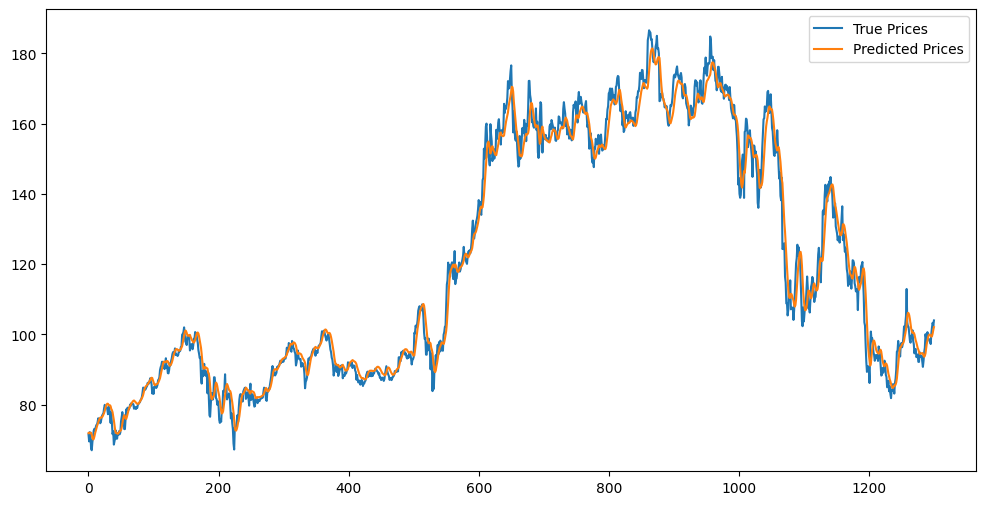

In [7]:

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss}')

# Predict
predictions = model.predict(X_test)

# Inverse scaling
predictions_inverse = scaler.inverse_transform(np.concatenate([predictions, np.zeros((predictions.shape[0], df.shape[1] - 1))], axis=1))[:, 0]
y_test_inverse = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], df.shape[1] - 1))], axis=1))[:, 0]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inverse, predictions_inverse))
print(f'RMSE: {rmse}')

# Calculate MAE
mae = mean_absolute_error(y_test_inverse, predictions_inverse)
print(f'MAE: {mae}')

# Calculate MAPE
mape = np.mean(np.abs((y_test_inverse - predictions_inverse) / y_test_inverse)) * 100
print(f'MAPE: {mape}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='True Prices')
plt.plot(predictions_inverse, label='Predicted Prices')
plt.legend()
plt.show()
